In [1]:
#!pip install pandas as pd
import pandas as pd

In [17]:
#reading data in pandas Data frame
df = pd.read_csv("English.csv", header = None, encoding = "ISO-8859-1")
#Data Snapshot
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1|1|In the name of Allah,Most Gracious,Most Merciful.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1|2|Praise be to Allah,the Cherisher and Sustainer of the worlds;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1|3|Most Gracious,Most Merciful;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1|4|Master of the Day of Judgment.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1|5|Thee do we worship,and Thine aid we seek.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Create Surah & Ayat Index
df1 = df[0].str.split("|", expand = True)
df2 = pd.concat([df1,df.iloc[:,1:]], axis = 1)
#Combine Columns 2:16 in one
df_a = pd.DataFrame()
for a,b in df2.iterrows():
    load = b[2:]    
    data = ''
    for aa in load:
        if str(aa) != 'nan':
            data += str(aa)
    df_a = df_a.append([data])
#Concatenate to orignal    
df3 = pd.concat([df2.iloc[:,:2],df_a.reset_index().rename(columns = {0:"Data"})], axis = 1).drop(columns = 'index').rename(columns = {0:"Surah",1:'Ayat'})
df3.head()

,Surah,Ayat,Data
0,1,1,In the name of Allah Most Gracious Most Merciful.
1,1,2,Praise be to Allah the Cherisher and Sustainer...
2,1,3,Most Gracious Most Merciful;
3,1,4,Master of the Day of Judgment.
4,1,5,Thee do we worship and Thine aid we seek.


**Feature Engineering**

In [4]:
#Adding index of chapters 
for col in ['Surah', 'Ayat']:
    df3[col] = pd.to_numeric(df3[col])

def idx(i, j):
    df3['index'] = df.index
    return int(df3.loc[(df3['Surah']==i) & (df3['Ayat']==j), 'index'])

cut_points = [-1, idx(2,141), idx(2,252), idx(3,92), idx(4,23), idx(4,147), idx(5,81), idx(6,110), idx(7,87), idx(8,40),
             idx(9,92), idx(11,5), idx(12,52), idx(14,52), idx(16,128), idx(18,74), idx(20,135), idx(22,78), idx(25,20),
             idx(27,55), idx(29,45), idx(33,30), idx(36,27), idx(39,31), idx(41,46), idx(45,37), idx(51,30), idx(57,29),
             idx(66,12), idx(77,50), idx(114,6)]
label_names = [str(i) for i in range(1, len(cut_points))]

if 'Para' not in df3.columns:
    df3.insert(2, 'Para', pd.cut(df.index,cut_points,labels=label_names))
df3.drop('index', axis=1, inplace=True)
df3['Para'] = pd.to_numeric(df3['Para'])
df3.head()

,Surah,Ayat,Para,Data
0,1,1,1,In the name of Allah Most Gracious Most Merciful.
1,1,2,1,Praise be to Allah the Cherisher and Sustainer...
2,1,3,1,Most Gracious Most Merciful;
3,1,4,1,Master of the Day of Judgment.
4,1,5,1,Thee do we worship and Thine aid we seek.


In [ ]:
#SAVING CHAPTER WISE MASTER 
df3.to_csv("Supervised_ML_Master/Para_Wise_M_L-Model_OF_NOBEL_QURAN.csv", index=False)

In [5]:
#SORTING SURAH WISE
surahs = df3['Surah'].unique().tolist()

Surah_Data = []
for surah in surahs:
    Data = ''
    for val in df3[df3["Surah"] == surah]['Data']:
        Data += val
    Surah_Data.append(Data)
Surahs_df = pd.DataFrame({'Data':Surah_Data}).reset_index().rename(columns = {'index':"Surah"})
Surahs_df.head()

,Surah,Data
0,0,In the name of Allah Most Gracious Most Mercif...
1,1,A.L.M.This is the Book; in it is guidance sure...
2,2,A. L. M.Allah! There is no god but He#NAME? th...
3,3,O mankind! reverence your Guardian-Lord who cr...
4,4,O ye who believe! fulfil (all) obligations. La...


In [7]:
# Adding Names of Surah and other important features from Wikipedia
wikipedia_link = 'https://en.wikipedia.org/wiki/List_of_chapters_in_the_Quran'
from bs4 import BeautifulSoup
import requests
req =  requests.get(wikipedia_link)
soup =  BeautifulSoup(req.content, 'html')
surah_rows = soup.find('table', class_= 'sortable' ).find('tbody').find_all('tr')[1:]

In [8]:
#preview of Data information
surahs_list = []
for i in surah_rows:
    surah_dict = {} 
    single_surah_data = i.find_all('td')
    #surah_dict['SurahNumber'] = single_surah_data[0].get_text().strip()
    surah_dict['EnglishTitle'] = single_surah_data[1].get_text().strip()
    surah_dict['ArabicTitle'] = single_surah_data[2].find('span').get_text()
    surah_dict['NumberOfVerses'] = single_surah_data[4].get_text().split(' ')[0]
    surah_dict['NumberOfRukus'] = single_surah_data[4].get_text().split(' ')[1]
    surah_dict['PlaceOfRevelation'] = single_surah_data[5].get_text()
    surahs_list.append(surah_dict)
df_surah_information = pd.DataFrame(surahs_list).reset_index().rename(columns = {'index':"Surah Number"})
df_surah_information['Surah Number'] = df_surah_information['Surah Number'].astype(int)
df_surah_information

,Surah Number,EnglishTitle,ArabicTitle,NumberOfVerses,NumberOfRukus,PlaceOfRevelation
0,0,Al-Fatihah,ٱلْفَاتِحَة,7,(1),Makkah
1,1,Al-Baqarah,ٱلْبَقَرَة,286,(40),Madinah
2,2,Ali 'Imran,آلِ عِمْرَان,200,(20),Madinah
3,3,An-Nisa,ٱلنِّسَاء,176,(24),Madinah
4,4,Al-Ma'idah,ٱلْمَائِدَة,120,(16),Madinah
...,...,...,...,...,...,...
109,109,An-Nasr,ٱلنَّصْر,3,(1/3),Madinah
110,110,Al-Masad,ٱلْمَسَد,5,(1/3),Makkah
111,111,Al-Ikhlaas,ٱلْإِخْلَاص,4,(1/3),Makkah
112,112,Al-Falaq,ٱلْفَلَق,5,(1/3),Makkah


In [9]:
# Join of Main data and Data information
df_Master = pd.merge(Surahs_df, df_surah_information, how = 'left', left_on=['Surah'], right_on = ['Surah Number'])
df_Master.head()

,Surah,Data,Surah Number,EnglishTitle,ArabicTitle,NumberOfVerses,NumberOfRukus,PlaceOfRevelation
0,0,In the name of Allah Most Gracious Most Mercif...,0,Al-Fatihah,ٱلْفَاتِحَة,7,(1),Makkah
1,1,A.L.M.This is the Book; in it is guidance sure...,1,Al-Baqarah,ٱلْبَقَرَة,286,(40),Madinah
2,2,A. L. M.Allah! There is no god but He#NAME? th...,2,Ali 'Imran,آلِ عِمْرَان,200,(20),Madinah
3,3,O mankind! reverence your Guardian-Lord who cr...,3,An-Nisa,ٱلنِّسَاء,176,(24),Madinah
4,4,O ye who believe! fulfil (all) obligations. La...,4,Al-Ma'idah,ٱلْمَائِدَة,120,(16),Madinah


In [10]:
df_Master_Edit =  df_Master.copy()

**Supervised_Machine_Learning_Analysis**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
df_MakiMadni = df_Master_Edit['PlaceOfRevelation'].value_counts()

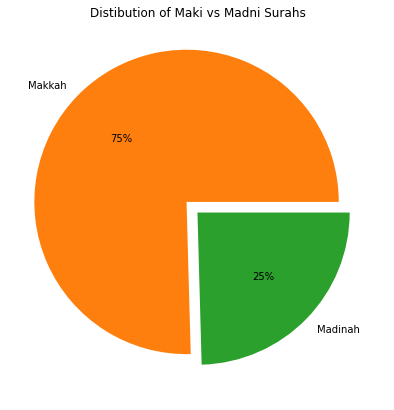

In [13]:
colors = sns.color_palette()
plt.figure(figsize=(10, 7))
#create pie chart
plt.pie(df_MakiMadni.values, labels = df_MakiMadni.index, colors = colors[1:], autopct='%.0f%%', explode =(0.1, 0.0))
plt.title('Distibution of Maki vs Madni Surahs')
plt.show()

c:\users\the laptop store\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


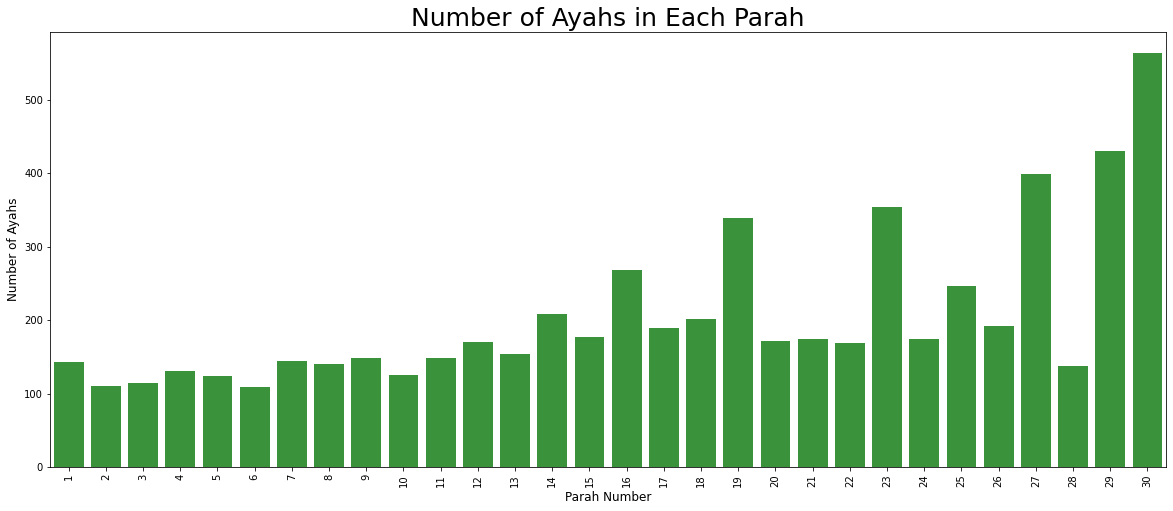

    Para  TotalNumberofAyats
0      1                 143
1      2                 111
2      3                 115
3      4                 131
4      5                 124
5      6                 109
6      7                 144
7      8                 141
8      9                 149
9     10                 126
10    11                 149
11    12                 170
12    13                 154
13    14                 208
14    15                 177
15    16                 269
16    17                 190
17    18                 202
18    19                 339
19    20                 171
20    21                 175
21    22                 169
22    23                 354
23    24                 174
24    25                 246
25    26                 192
26    27                 399
27    28                 137
28    29                 430
29    30                 564


In [14]:
#count verses per chapter
df_ayahcount_perparah = df3.groupby(['Para']).agg(TotalNumberofAyats = ('Ayat', 'count')).reset_index()
x= df_ayahcount_perparah['Para']
y= df_ayahcount_perparah['TotalNumberofAyats']
plt.figure(figsize=(20,8))
sns.barplot(x, y,  color=color[2])
plt.xticks(rotation='vertical')
plt.xlabel('Parah Number', fontsize=12)
plt.ylabel('Number of Ayahs', fontsize=12)
plt.title("Number of Ayahs in Each Parah", fontsize = 25)
plt.show()
print (df_ayahcount_perparah)